<a href="https://colab.research.google.com/github/gpetrini/HO236/blob/master/Atividade_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:** Gabriel Petrini da Silvira

**RA:** 155468

# Carregando pacotes

In [0]:
import pandas as pd # DataFrames
import numpy as np # Matemático
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Adiciona funções ao plt
import statsmodels.api as sm # Pacote para séries temporais
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Gráfico de autocorrelação e autocorrelação parcial
from statsmodels.tsa.stattools import adfuller # Carrega teste adf

plt.style.use("seaborn-white") # Define layout de gráfico padrão
%config InlineBackend.figure_format = 'retina' # Gráficos com maior definição

# Importando dados

In [0]:
df = pd.read_excel('https://github.com/gpetrini/HO236/blob/master/Atividades/Atividade_01/ipeadata%5B01-04-2019-10-27%5D.xls?raw=true', index_col='Data', parse_dates=True) # Importando
df.columns = ['Câmbio real/dólar (compra) - Média'] # Renomeando colunas
df.head() # Disponibiliza primeiras obs

,Câmbio real/dólar (compra) - Média
Data,
2002-01-01,2.3771
2002-02-01,2.4188
2002-03-01,2.3458
2002-04-01,2.3196
2002-05-01,2.4796


Inspecionando dados

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2002-01-01 to 2019-03-01
Data columns (total 1 columns):
Câmbio real/dólar (compra) - Média    207 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


# Gráfico e correlograma

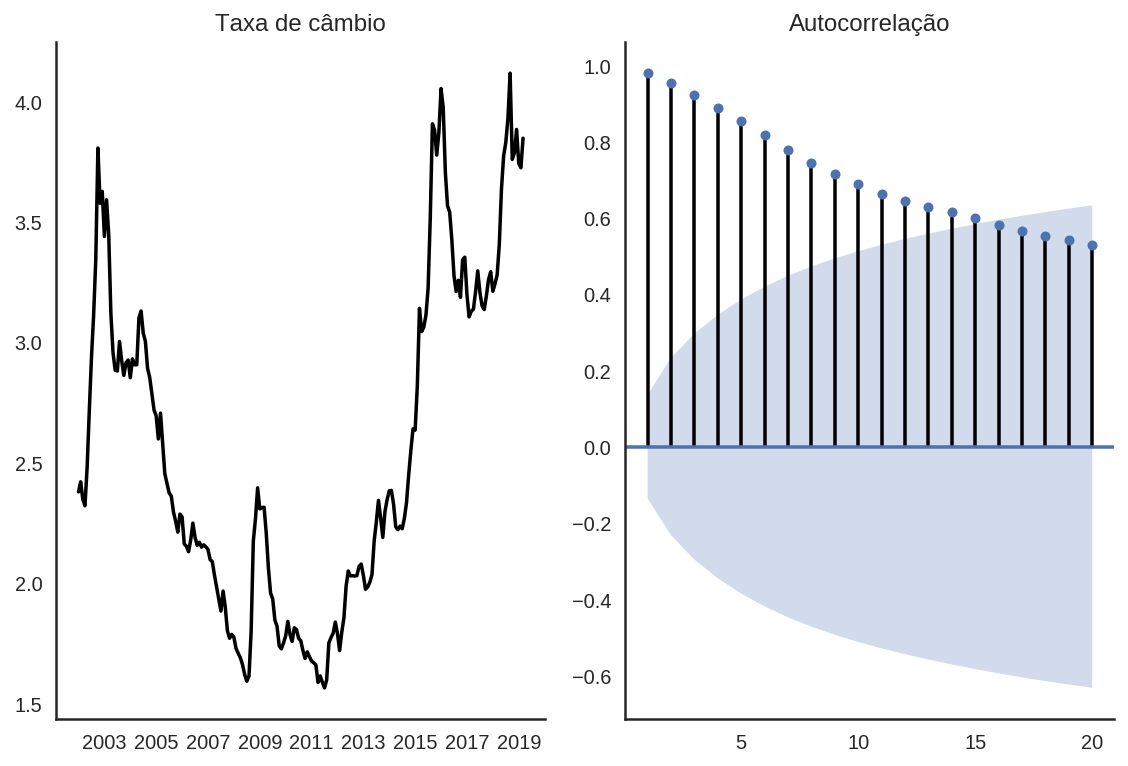

In [0]:
fig, ax = plt.subplots(1,2)

df.plot(ax = ax[0], title = "Taxa de câmbio", legend = False, color = "black")
ax[0].set_xlabel("")
plot_acf(df, ax = ax[1], title = "Autocorrelação", lags = 20, zero = False)

sns.despine() # Remove eixos desnecessários
plt.tight_layout() # Ajusta espaçamento entre gráficos
plt.show() # Disponibiliza gráfico

Tanto pelo gráfico da série quanto pelo correlograma, suspeita-se de que a série em questão não se trata de uma série estacionária. Sugere-se a realização de um teste de raíz unitária.

# Teste de raiz unitária (ADF)

Teste com constante e tendência com BIC como critério de seleção dos lags

In [0]:
result = adfuller(df.iloc[:,0], regression = "ct", autolag = "BIC")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.275661
p-value: 0.893817
	1%: -4.004
	5%: -3.432
	10%: -3.140


A um nível de significância de 5%, não rejeita-se a hipótese nula. É preciso testar ajuste sem tendência:

In [0]:
result = adfuller(df.iloc[:,0], regression = "c", autolag = "BIC")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.913061
p-value: 0.783641
	1%: -3.463
	5%: -2.876
	10%: -2.574


Ao mesmo nível de significância, não rejeita-se a hipótese nula. É preciso inspecionar o ajuste sem intercepto e sem tendência:

In [0]:
result = adfuller(df.iloc[:,0], regression = "nc", autolag = "BIC")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.422238
p-value: 0.806410
	1%: -2.577
	5%: -1.942
	10%: -1.616


Também não se rejeita a hipótese nula. Portanto, esta série apresenta uma raíz unitária. A seguir, será avaliado se a série em diferença é estacionária:

In [0]:
result = adfuller(df.apply(lambda x: x - x.shift()).dropna().iloc[:,0], regression = "c", autolag = "BIC")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.461317
p-value: 0.000000
	1%: -3.463
	5%: -2.876
	10%: -2.574


A um nível de significância de 5%, rejeita-se a hipótese nula, logo, a série da taxa de câmbio de compra média é estacionária em primeira diferença. Seguem os gráficos das série tomada em diferença:

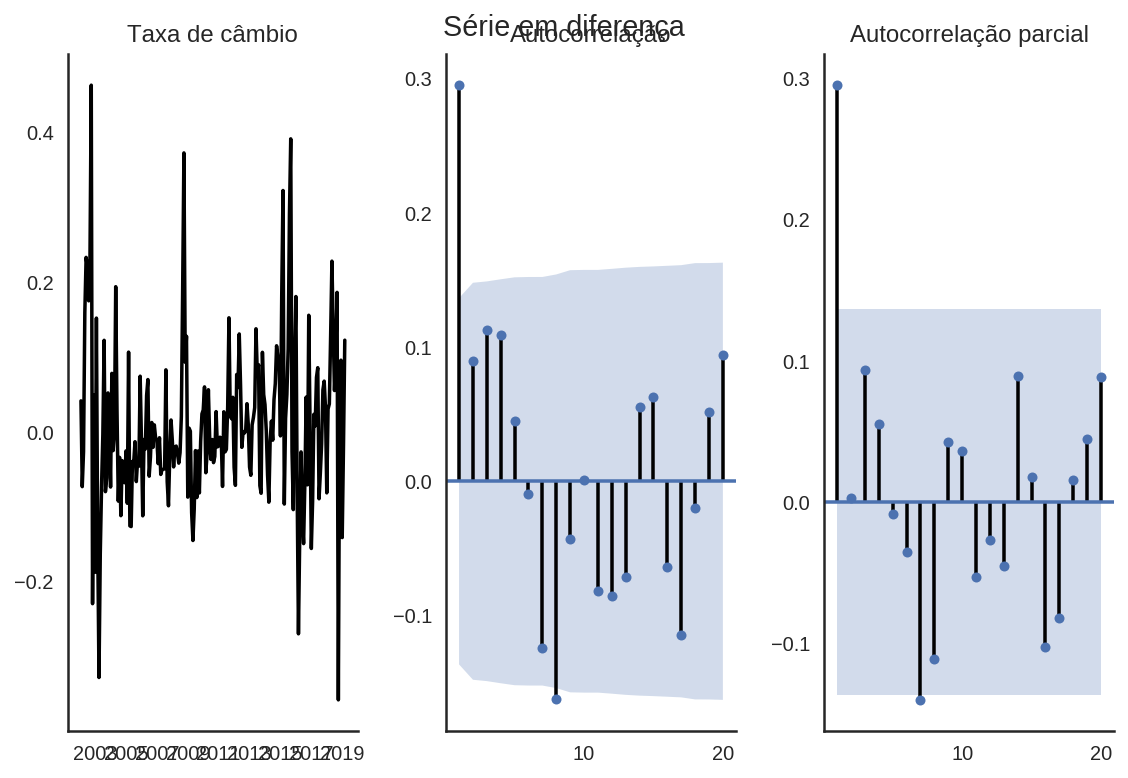

In [0]:
fig, ax = plt.subplots(1,3)

df.apply(lambda x: x - x.shift()).plot(ax = ax[0], title = "Taxa de câmbio", legend = False, color = "black")
ax[0].set_xlabel("")
plot_acf(df.apply(lambda x: x - x.shift()).dropna(), ax = ax[1], title = "Autocorrelação", lags = 20, zero = False)
plot_pacf(df.apply(lambda x: x - x.shift()).dropna(), ax = ax[2], title = "Autocorrelação parcial", lags = 20, zero = False)

sns.despine() # Remove eixos desnecessários
plt.tight_layout() # Ajusta espaçamento entre gráficos
fig.suptitle("Série em diferença")
plt.show() # Disponibiliza gráfico